# Exploring TSV files`

### Imports

In [1]:
import os       # using operating system dependent functionality (folders)
import glob
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
# import copy     # Can Copy and Deepcopy files so original file is untouched.
# from ipywidgets import IntSlider, Output
import ipywidgets as widgets
# from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '../') # path to functions
from cvasl import file_handler as fh # 
from cvasl import mold #
from cvasl import carve
from cvasl.file_handler import Config

### Configure data

In [2]:
config = Config()
root_mri_directory = config.get_directory('raw_data')

### Load tsv files

In [3]:
tsv_pattern = os.path.join(root_mri_directory, '**/*.tsv')
tsv_files = glob.glob(tsv_pattern, recursive=True)

### check tsv files 
Optional commented out

In [4]:
dataframe_example = pd.read_csv(tsv_files[0], sep='\t', header=[0,1])

In [5]:
dataframe_example

,participant_id,session,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,WMH_count,MeanMotion,DeepWM_B,DeepWM_L,DeepWM_R
,StudyID,...,integer,integer,integer,Liter,Liter,Liter,ratio GM/ICV,ratio (GM+WM)/ICV,mL,n lesions (integer),mm,SD/mean,SD/mean,SD/mean
0,sub-100151241_1,ASL_1,TimePoint_1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000
1,sub-100151242_1,ASL_1,TimePoint_1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000
2,sub-10015124_1,ASL_1,TimePoint_1,3,1,0.56794,0.47687,0.34052,0.40997,0.75420,4.889,16.0,0.16098,10.9918,10.8279,11.0443
3,sub-10015124_2,ASL_1,TimePoint_2,3,1,0.56664,0.47270,0.34156,0.41034,0.75265,7.444,19.0,0.17257,7.9018,9.0773,6.8846
4,sub-100248221_1,ASL_1,TimePoint_1,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,sub-19995714_2,ASL_1,TimePoint_2,1300,1,0.63999,0.54546,0.42336,0.39780,0.73685,1.735,23.0,0.09423,20.3281,16.4068,25.2544
1666,sub-199968291_1,ASL_1,TimePoint_1,1301,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1667,sub-199968292_1,ASL_1,TimePoint_1,1302,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataframe_example.columns

MultiIndex([(       'participant_id',             'StudyID'),
            (              'session',                 '...'),
            ('LongitudinalTimePoint',             'integer'),
            (         'SubjectNList',             'integer'),
            (                 'Site',             'integer'),
            (               'GM_vol',               'Liter'),
            (               'WM_vol',               'Liter'),
            (              'CSF_vol',               'Liter'),
            (          'GM_ICVRatio',        'ratio GM/ICV'),
            (        'GMWM_ICVRatio',   'ratio (GM+WM)/ICV'),
            (              'WMH_vol',                  'mL'),
            (            'WMH_count', 'n lesions (integer)'),
            (           'MeanMotion',                  'mm'),
            (             'DeepWM_B',             'SD/mean'),
            (             'DeepWM_L',             'SD/mean'),
            (             'DeepWM_R',             'SD/mean')],
       

In [7]:
## check tsv file diversity
#tsv_files

### Adding age to analysis

Now we want to take the csv file with age and add it to the analysis.
For now we will hard-code the path, until we decide whether this should be part of the initialized setup on the config file

In [8]:
age_csv_place = "C:/Projects/brainspin/age_data"
age_csv_pattern = os.path.join(age_csv_place, '**/*.csv')
age_csv_files = glob.glob(age_csv_pattern, recursive=True)
age_dataframe_example1 = pd.read_csv(age_csv_files[0])
age_dataframe_example2 = pd.read_csv(age_csv_files[1])
age_dataframe_example3 = pd.read_csv(age_csv_files[2])

In [9]:
# superset of ages....must normalize column names and values
age_dataframe_example1 = age_dataframe_example1.rename(columns={"ageatscandate_i46p1": "age","participant ID": "participant_id"})
age_dataframe_example2 = age_dataframe_example2.rename(columns={"Age": "age","ID": "participant_id", "Sex":"sex"})
age_dataframe_example3 = age_dataframe_example3.rename(columns={"Age": "age","ID": "participant_id", "Sex":"sex"})
age_dataframe_example3 = age_dataframe_example3.drop("TP", axis=1)

In [10]:
# stack on top of each otehr
frames = [age_dataframe_example1, age_dataframe_example2, age_dataframe_example3]
super_age_set = pd.concat(frames)
super_age_set

,participant_id,sex,age,TP
0,10015124,2,69.733333,NaN
1,10024822,2,70.288889,NaN
2,10041211,1,71.430556,NaN
3,10075012,1,69.883333,NaN
4,10113912,1,69.866667,NaN
...,...,...,...,...
526,sub-1163_1,0,19.060000,NaN
527,sub-1165_1,0,33.860000,NaN
528,sub-1167_1,1,33.920000,NaN
529,sub-1168_1,1,45.310000,NaN


### Analysis

Without the subject ages we can not do an analysis on anything except how subjects progress over time points, and how various parameters predict each other. But let's scan all the tev we were given to see if we have ones with age. 

#### Correlations within datasets:

So now we can make a super-dataset of all the datasets, and see if these correlations hold. 

In [11]:
dataframe_example2 = pd.read_csv(tsv_files[1], sep='\t')
dataframe_example2.columns.to_list()

['participant_id',
 'session',
 'LongitudinalTimePoint',
 'SubjectNList',
 'Site',
 'GM_vol',
 'WM_vol',
 'CSF_vol',
 'GM_ICVRatio',
 'GMWM_ICVRatio',
 'WMH_vol',
 'WMH_count',
 'MeanMotion',
 'TL_hippocampus_B',
 'TL_hippocampus_L',
 'TL_hippocampus_R',
 'TL_amygdala_B',
 'TL_amygdala_L',
 'TL_amygdala_R',
 'TL_anterior_temporal_lobe_medial_part_B',
 'TL_anterior_temporal_lobe_medial_part_L',
 'TL_anterior_temporal_lobe_medial_part_R',
 'TL_anterior_temporal_lobe_lateral_part_B',
 'TL_anterior_temporal_lobe_lateral_part_L',
 'TL_anterior_temporal_lobe_lateral_part_R',
 'TL_parahippocampal_and_ambient_gyrus_B',
 'TL_parahippocampal_and_ambient_gyrus_L',
 'TL_parahippocampal_and_ambient_gyrus_R',
 'TL_superior_temporal_gyrus_middle_part_B',
 'TL_superior_temporal_gyrus_middle_part_L',
 'TL_superior_temporal_gyrus_middle_part_R',
 'TL_middle_and_inferior_temporal_gyrus_B',
 'TL_middle_and_inferior_temporal_gyrus_L',
 'TL_middle_and_inferior_temporal_gyrus_R',
 'TL_fusiform_gyrus_B',
 'TL

More elements than first...let's see what we have in common between the two tsv:

In [12]:
first = set(dataframe_example.columns.to_list())
second = set(dataframe_example2.columns.to_list())

In [13]:
# not_common2 =  list(set(dataframe_example2.columns.to_list()) - set(dataframe_example.columns.to_list()))

In [14]:
# shared = list(first.intersection(second))
# shared

Not a lot...let's look at what we have in common in all or most of the tsv

In [15]:
name_file = []
longlesses = []
for file in tsv_files:
    dataframe_example = pd.read_csv(file, sep='\t')
    longness = len(dataframe_example.columns)
    name_file.append(file)
    longlesses.append(longness)
data_tsv = pd.DataFrame([name_file, longlesses])        
print(longlesses)        

[16, 160, 22, 40, 16, 16, 160, 22, 40, 16, 17, 17, 17, 17, 15, 15, 15, 15, 15, 21, 39, 15, 15, 21, 39, 15, 1]


In [16]:
data_tsv

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...
1,16,160,22,40,16,16,160,22,40,16,...,15,15,21,39,15,15,21,39,15,1


So There may be 15 common features on most as a guess. We need to not look at the last on the list.

In [17]:
#print(name_file[:-1])

In [18]:
set_of_relevant_files = name_file[:-1]

In [19]:
name_file = []
longlesses = []
intersections = []
len_intersections = []
for file in set_of_relevant_files:
    dataframe_example = pd.read_csv(file, sep='\t')
    longness = len(dataframe_example.columns)
    name_file.append(file)
    longlesses.append(longness)
    dataframe_example2 = pd.read_csv(file, sep='\t')
    columns = dataframe_example2.columns.to_list()
    intersection = set(columns).intersection(second)
    intersections.append(intersection)
    len_intersections.append(len(intersection))
data_tsv = pd.DataFrame([name_file, longlesses, len_intersections, intersections])         

In [20]:
data_tsv

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...,C:/Projects/brainspin/not_pushed/data_anonymiz...
1,16,160,22,40,16,16,160,22,40,16,...,15,15,15,21,39,15,15,21,39,15
2,13,160,13,13,13,13,160,13,13,13,...,12,12,12,12,12,12,12,12,12,12
3,"{CSF_vol, MeanMotion, session, GMWM_ICVRatio, ...","{CSF_vol, PL_supramarginal_gyrus_L, TL_anterio...","{CSF_vol, MeanMotion, session, GMWM_ICVRatio, ...","{CSF_vol, MeanMotion, session, GMWM_ICVRatio, ...","{CSF_vol, MeanMotion, session, GMWM_ICVRatio, ...","{CSF_vol, MeanMotion, session, GMWM_ICVRatio, ...","{CSF_vol, PL_supramarginal_gyrus_L, TL_anterio...","{CSF_vol, MeanMotion, session, GMWM_ICVRatio, ...","{CSF_vol, MeanMotion, session, GMWM_ICVRatio, ...","{CSF_vol, MeanMotion, session, GMWM_ICVRatio, ...",...,"{CSF_vol, session, GMWM_ICVRatio, Site, Subjec...","{CSF_vol, session, GMWM_ICVRatio, Site, Subjec...","{CSF_vol, session, GMWM_ICVRatio, Site, Subjec...","{CSF_vol, session, GMWM_ICVRatio, Site, Subjec...","{CSF_vol, session, GMWM_ICVRatio, Site, Subjec...","{CSF_vol, session, GMWM_ICVRatio, Site, Subjec...","{CSF_vol, session, GMWM_ICVRatio, Site, Subjec...","{CSF_vol, session, GMWM_ICVRatio, Site, Subjec...","{CSF_vol, session, GMWM_ICVRatio, Site, Subjec...","{CSF_vol, session, GMWM_ICVRatio, Site, Subjec..."


So we will have twelve or thireen common elements we can compare.Let's look at hope they are about the same.

In [21]:
# data_tsv[0][3]

In [22]:
#data_tsv[2][3]

In [23]:
#data_tsv[4][3]

In [24]:
#data_tsv[4][3].intersection(data_tsv[2][3]).intersection(data_tsv[0][3]).intersection(data_tsv[5][3]).intersection(data_tsv[3][3]).intersection(data_tsv[6][3]).intersection(data_tsv[7][3])

OK, so more or less we should have the above values in every group of tsv in our supergroup.
Let's check if we do

In [25]:
list_elements = data_tsv[4][3].intersection(data_tsv[2][3]).intersection(data_tsv[0][3]).intersection(data_tsv[5][3]).intersection(data_tsv[3][3]).intersection(data_tsv[6][3]).intersection(data_tsv[7][3])

In [26]:
#list_elements

In [27]:
name_file = []
longlesses = []
good_files = []
for file in tsv_files:
    dataframe_example = pd.read_csv(file, sep='\t')
    if set(list_elements).issubset(set(dataframe_example.columns.to_list())):
                                   good_files.append(file)
# print(good_files)        

In [28]:
len(good_files)

10

Here we must say in this set, the set of common elements is about:
CSV_vol,  'GMWM_ICVRatio',
 'GM_ICVRatio',
 'GM_vol',
 'LongitudinalTimePoint',
 'MeanMotion',
 'Site',
 'SubjectNList',
 'WMH_count',
 'WMH_vol',
 'WM_vol',
 'participant_id',
 'session'
 
 However we need something to extract the common set from any group of tsv columns

In [29]:
a = fh.extract_common_columns(good_files)

In [30]:
good_columns_sets = fh.intersect_all(*a)

Now we make our super tsv file

In [31]:
good_columns_list = list(a)
good_columns_list

['CSF_vol',
 'MeanMotion',
 'session',
 'GMWM_ICVRatio',
 'Site',
 'SubjectNList',
 'participant_id',
 'WMH_count',
 'WMH_vol',
 'WM_vol',
 'LongitudinalTimePoint',
 'GM_ICVRatio',
 'GM_vol']

Here we see that every file should have participant_id. 

In [32]:
tabs_together = []
for file in good_files:
    tabular = pd.read_csv(file, sep='\t',  header=[0,1])
    tabularnow = tabular[good_columns_list]
    tabs_together.append(tabularnow)

In [33]:
len(tabs_together)

10

now if tsvs were different we could stack 8 elements of tabular ...and make a supercomparator, but we seem tohave the same tsv over and over because the first ten with thesame columns are the same...wierd check wth scientists..looking at the names they all came from the same day. let's check all dates

So we have three kinds, many times duplicated over- must dicuss with scientists. UNtil then let's reduce and combine

In [34]:
tabs_together[0].columns

MultiIndex([(              'CSF_vol',               'Liter'),
            (           'MeanMotion',                  'mm'),
            (              'session',                 '...'),
            (        'GMWM_ICVRatio',   'ratio (GM+WM)/ICV'),
            (                 'Site',             'integer'),
            (         'SubjectNList',             'integer'),
            (       'participant_id',             'StudyID'),
            (            'WMH_count', 'n lesions (integer)'),
            (              'WMH_vol',                  'mL'),
            (               'WM_vol',               'Liter'),
            ('LongitudinalTimePoint',             'integer'),
            (          'GM_ICVRatio',        'ratio GM/ICV'),
            (               'GM_vol',               'Liter')],
           )

In [35]:
len(tabs_together)

10

In [36]:
properly_different_dataframes = fh.unduplicate_dfs(tabs_together)

In [40]:
# result = result.droplevel(1, axis=1)
len(properly_different_dataframes)

1

In [41]:
for file in properly_different_dataframes:
    file = file.droplevel(1, axis=1)
file    

,CSF_vol,MeanMotion,session,GMWM_ICVRatio,Site,SubjectNList,participant_id,WMH_count,WMH_vol,WM_vol,LongitudinalTimePoint,GM_ICVRatio,GM_vol
0,NaN,NaN,ASL_1,NaN,1,1,sub-100151241_1,NaN,NaN,NaN,TimePoint_1,NaN,NaN
1,NaN,NaN,ASL_1,NaN,1,2,sub-100151242_1,NaN,NaN,NaN,TimePoint_1,NaN,NaN
2,0.34052,0.16098,ASL_1,0.75420,1,3,sub-10015124_1,16.0,4.889,0.47687,TimePoint_1,0.40997,0.56794
3,0.34156,0.17257,ASL_1,0.75265,1,3,sub-10015124_2,19.0,7.444,0.47270,TimePoint_2,0.41034,0.56664
4,NaN,NaN,ASL_1,NaN,1,4,sub-100248221_1,NaN,NaN,NaN,TimePoint_1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,0.42336,0.09423,ASL_1,0.73685,1,1300,sub-19995714_2,23.0,1.735,0.54546,TimePoint_2,0.39780,0.63999
1666,NaN,NaN,ASL_1,NaN,1,1301,sub-199968291_1,NaN,NaN,NaN,TimePoint_1,NaN,NaN
1667,NaN,NaN,ASL_1,NaN,1,1302,sub-199968292_1,NaN,NaN,NaN,TimePoint_1,NaN,NaN
1668,0.40260,NaN,ASL_1,0.70909,1,1303,sub-19996829_1,41.0,15.875,0.45926,TimePoint_1,0.37723,0.52206


In [49]:
result_no_str= file.drop('LongitudinalTimePoint', axis=1)
result_no_str

,CSF_vol,MeanMotion,session,GMWM_ICVRatio,Site,SubjectNList,participant_id,WMH_count,WMH_vol,WM_vol,GM_ICVRatio,GM_vol
0,NaN,NaN,ASL_1,NaN,1,1,sub-100151241_1,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,ASL_1,NaN,1,2,sub-100151242_1,NaN,NaN,NaN,NaN,NaN
2,0.34052,0.16098,ASL_1,0.75420,1,3,sub-10015124_1,16.0,4.889,0.47687,0.40997,0.56794
3,0.34156,0.17257,ASL_1,0.75265,1,3,sub-10015124_2,19.0,7.444,0.47270,0.41034,0.56664
4,NaN,NaN,ASL_1,NaN,1,4,sub-100248221_1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1665,0.42336,0.09423,ASL_1,0.73685,1,1300,sub-19995714_2,23.0,1.735,0.54546,0.39780,0.63999
1666,NaN,NaN,ASL_1,NaN,1,1301,sub-199968291_1,NaN,NaN,NaN,NaN,NaN
1667,NaN,NaN,ASL_1,NaN,1,1302,sub-199968292_1,NaN,NaN,NaN,NaN,NaN
1668,0.40260,NaN,ASL_1,0.70909,1,1303,sub-19996829_1,41.0,15.875,0.45926,0.37723,0.52206


In [46]:
super_age_set = super_age_set.drop("TP", axis= 1)
super_age_set

,participant_id,sex,age
0,10015124,2,69.733333
1,10024822,2,70.288889
2,10041211,1,71.430556
3,10075012,1,69.883333
4,10113912,1,69.866667
...,...,...,...
526,sub-1163_1,0,19.060000
527,sub-1165_1,0,33.860000
528,sub-1167_1,1,33.920000
529,sub-1168_1,1,45.310000


In [47]:
# Here merge with ages
final_df = pd.merge(result_no_str,super_age_set)

In [50]:
final_df

,CSF_vol,MeanMotion,session,GMWM_ICVRatio,Site,SubjectNList,participant_id,WMH_count,WMH_vol,WM_vol,GM_ICVRatio,GM_vol,sex,age


C:\Users\makeda\anaconda3\envs\mrilandings\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\makeda\anaconda3\envs\mrilandings\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

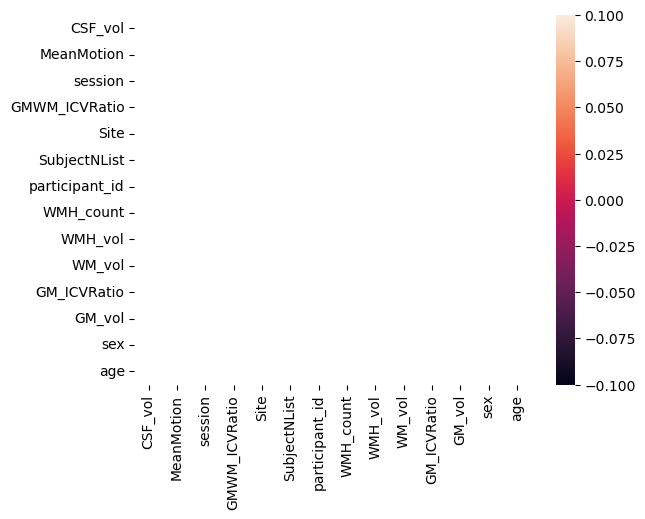

In [48]:
%matplotlib inline
sns.heatmap(final_df.corr(), annot = True)

So we see a good correlation between grey matter and white matter volumes, and therefore unsurprisingle a good correlation on GMWM-ICVratio and GM_ICV ratio. We also see a great negative correation between CSF volume and GMWM-ICV (also also GM)ICV). These things show our datasets seems to be reflecting expected reality.
One next next step is to correlate with age.

But let's keep seeing how we can look for things in our tsv.
Below is an example

In [ ]:
fh.find_where_column(tsv_files, ['CSF_vol', 'WM_vol'])

Now a coding scientist can continue by finding sets of tsv for specific quesitons